# Example from the paper

In [17]:
# use the outgrad backage for the coputations of gradient
import functions 
import autograd.numpy as np
import pandas as pd
import subprocess
import time
import matplotlib.pyplot as plt
   
np.random.seed(0)                      # to obtain a consistent solution

In [18]:
#define the right side function of the system of differential equations
def right_side(x, y):
    f1 = np.cos(x)+(y[0])**2+y[1]-(1+x**2+np.sin(x)*np.sin(x))
    f2 = 2*x-(1+x*x)*np.sin(x) + y[0]*y[1]
    return np.array([f1,f2])

In [19]:
# the initial values 
a1 = 0
a2=  1.0

In [20]:
# the analytical solution is given by 
def analytic(x):
    an_sol = np.zeros((2, len(x)))
    an_sol[0] = np.sin(x)
    an_sol[1] = 1+x*x  
    return an_sol  

Cost after iteration 10: 2.296686
Cost after iteration 20: 0.821523
Cost after iteration 30: 0.364431
Cost after iteration 40: 0.096480
Cost after iteration 50: 0.040598
Cost after iteration 60: 0.022038
Cost after iteration 70: 0.017888
Cost after iteration 80: 0.017338
Cost after iteration 90: 0.015742
Cost after iteration 100: 0.015037
time : 0.28854799270629883s
Cost after iteration 10: 1.485642
Cost after iteration 20: 0.539031
Cost after iteration 30: 0.130405
Cost after iteration 40: 0.025447
Cost after iteration 50: 0.014739
Cost after iteration 60: 0.011898
Cost after iteration 70: 0.009585
Cost after iteration 80: 0.009378
Cost after iteration 90: 0.009261
Cost after iteration 100: 0.009182
time : 0.21892404556274414s
Cost after iteration 10: 0.856065
Cost after iteration 20: 0.128384
Cost after iteration 30: 0.088734
Cost after iteration 40: 0.043101
Cost after iteration 50: 0.014158
Cost after iteration 60: 0.009507
Cost after iteration 70: 0.008100
Cost after iteration 80:

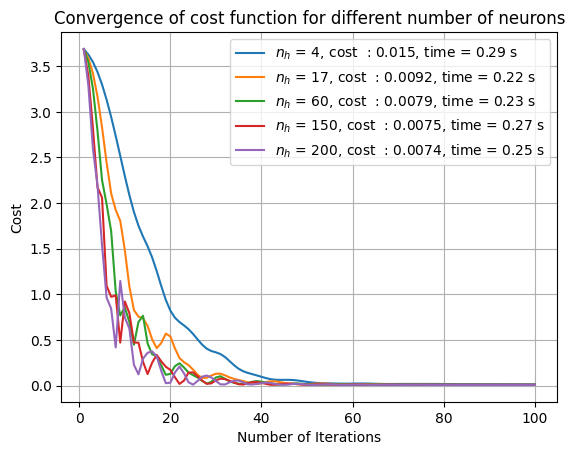

In [21]:
#====================Experiment 1: numbers of neurons for network with 1 hidden layer ========================================
"""
Experiment for comparing the performance of the network as a fucntion of numbers of neuron.
The code is for system of differential equations with two unknowns y1, y2. 
"""
# Input Data
a , b= [0.0, 1.0]               # the domain        
m = 11                          # number of sample points between 0 and 1.

x = np.linspace(a,b, m)         # generate m sample points

X = np.zeros((1,m))             # form a matrix containing the sample points
X[0] = x

# Define the neural network sturctue, loop over different sizes
H = [4, 17, 60, 150, 200]            # different sizes for the hidden layer
ITs = 100                            # number of iterations - max to convergence
tol = 1e-04                          # the tollerance

fig1 = plt.figure()
for h in  H:      
    # The training, measuring the time for the convergence corresponding to the size of neurons.
    tic = time.time()
    param1, param2, Cost, Iter = functions.ode_nn_model1(X, h ,a1, a2, a, right_side,  tol, ITs, iter = 0, print_cost = True)
    toc = time.time()
    print("time : " + str((toc-tic))+ "s")
    
    #plot    
    plt.plot(Iter, Cost, label='$ n_{h}$ = ' + str(h)+ ', cost  : ' + str(round(Cost[-1],4)) + ', time = ' + str(round((toc-tic),2)) + ' s')
    
    
plt.legend( )
plt.title("Convergence of cost function for different number of neurons" )
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()